In [1]:
# Reading sample edge file uploaded on Google Drive using networkx
import networkx as nx
from google.colab import drive
import matplotlib.pyplot as plt

In [2]:
# Mounting Google drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load file
sample_edge_file = '/content/drive/My Drive/ml_mini_project_data/sample_network.txt'
sample_network = nx.read_edgelist(sample_edge_file)

In [4]:
# Basic details about the network
print("Number of nodes:", sample_network.number_of_nodes())
print("Number of edges:", sample_network.number_of_edges())

Number of nodes: 21
Number of edges: 31


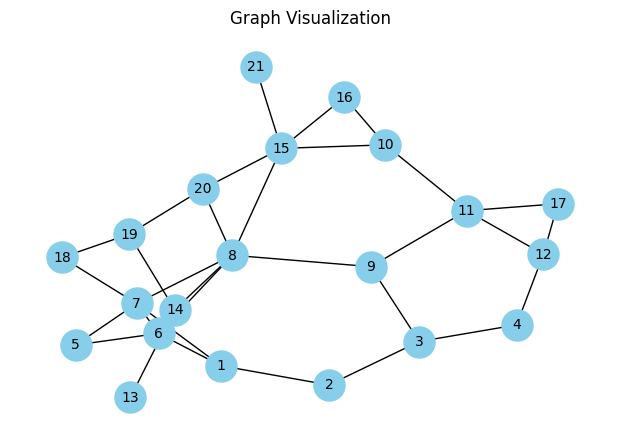

In [5]:
# Plotting the network for visualization
plt.figure(figsize=(6,4))
pos = nx.spring_layout(sample_network)
nx.draw(sample_network, pos, with_labels=True, node_color='skyblue', node_size=500, edge_color='black', linewidths=1, font_size=10)
plt.title("Graph Visualization")
plt.show()

In [6]:
# Function to plot ego network to visualize indivizual ego network/s
def plot_ego_network_feature(network, node):

    ego_net_1 = nx.ego_graph(network, node)
    ego_net_2 = nx.ego_graph(network, node, radius=2)
    print(f'Ego Network for node - {node}')

    # Create subplots
    fig, axs = plt.subplots(1, 2, figsize=(8, 4))

    # Plot ego_net_1
    axs[0].set_title("1st Ego Network")
    pos_1 = nx.spring_layout(ego_net_1)
    nx.draw(ego_net_1, pos_1, with_labels=True, node_color='skyblue', node_size=500, edge_color='black', linewidths=1, font_size=10, ax=axs[0])

    # Plot ego_net_2
    axs[1].set_title("2nd Ego Network")
    pos_2 = nx.spring_layout(ego_net_2)
    nx.draw(ego_net_2, pos_2, with_labels=True, node_color='skyblue', node_size=500, edge_color='black', linewidths=1, font_size=10, ax=axs[1])

    plt.show()

Ego Network for node - 1


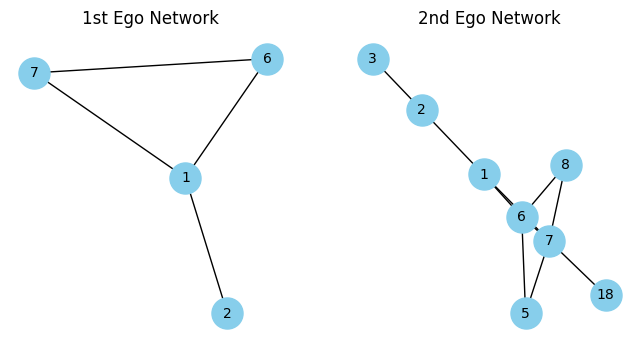

Ego Network for node - 2


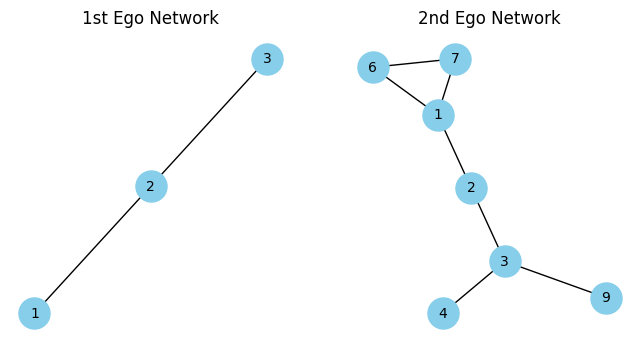

Ego Network for node - 6


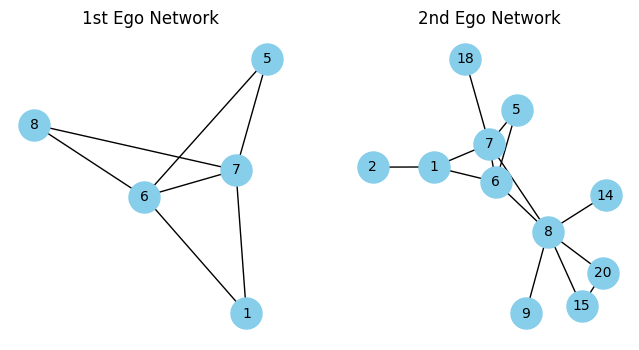

Ego Network for node - 7


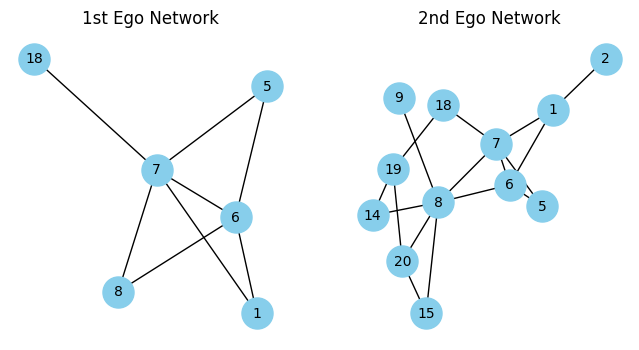

Ego Network for node - 3


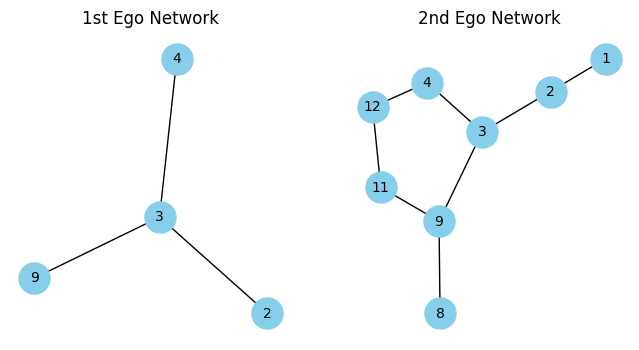

Ego Network for node - 4


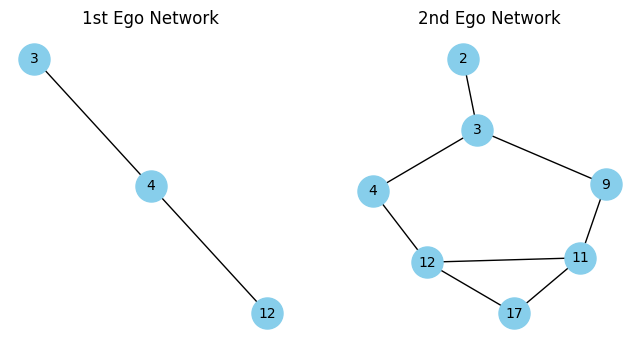

Ego Network for node - 9


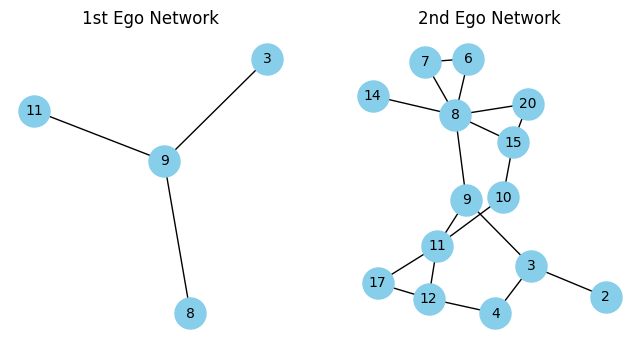

Ego Network for node - 12


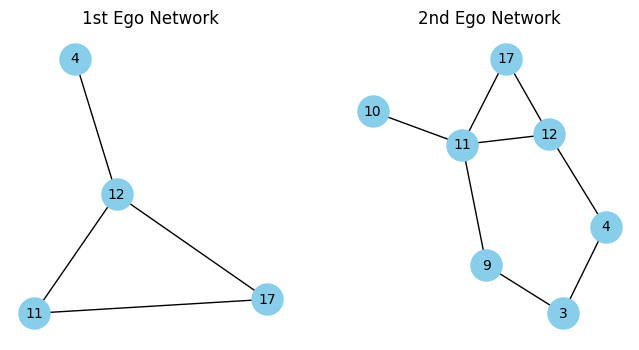

Ego Network for node - 5


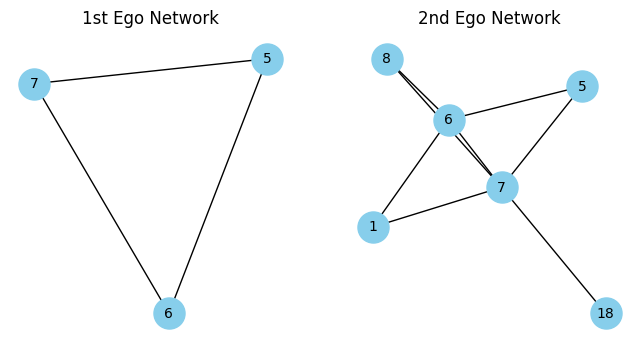

Ego Network for node - 8


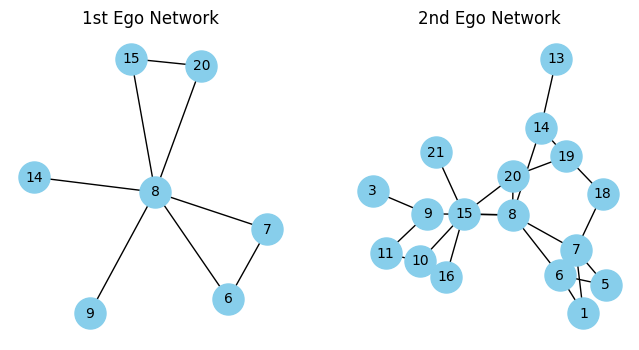

Ego Network for node - 18


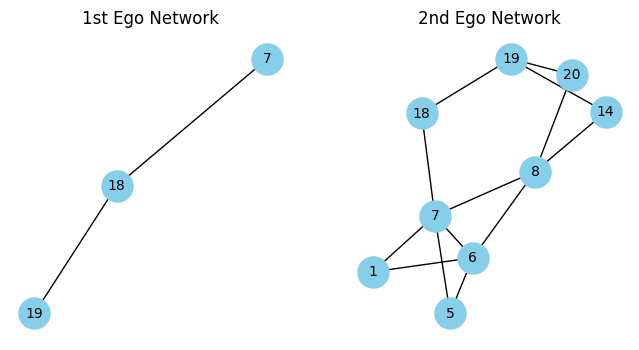

Ego Network for node - 14


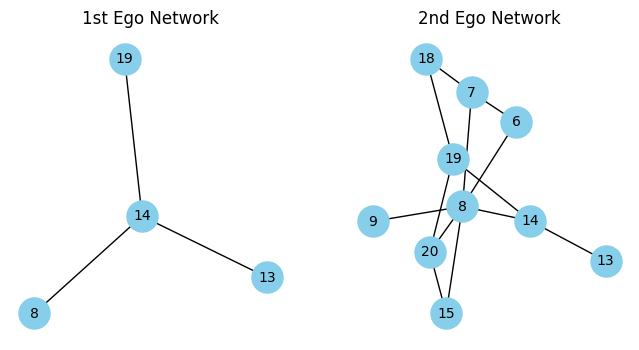

Ego Network for node - 15


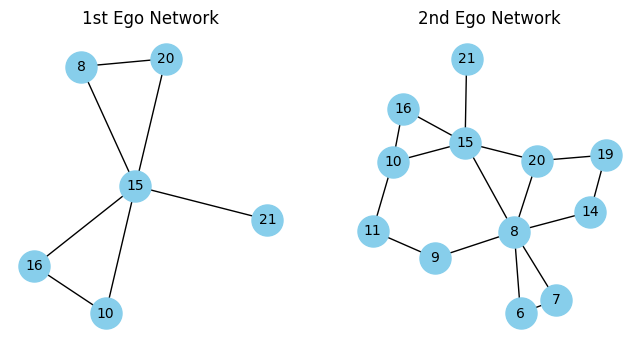

Ego Network for node - 20


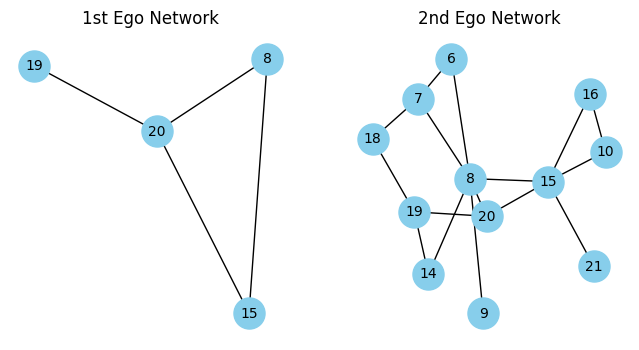

Ego Network for node - 11


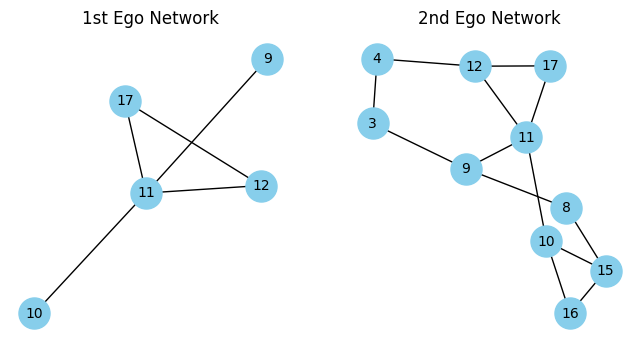

Ego Network for node - 10


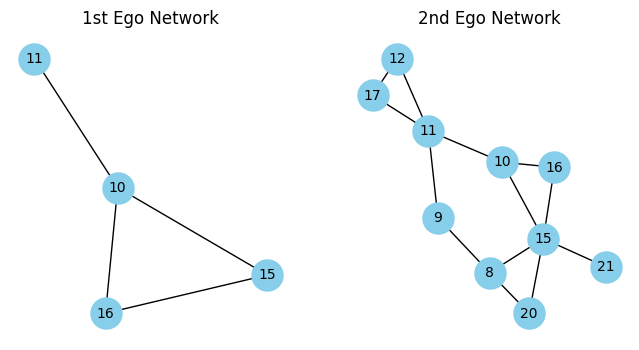

Ego Network for node - 16


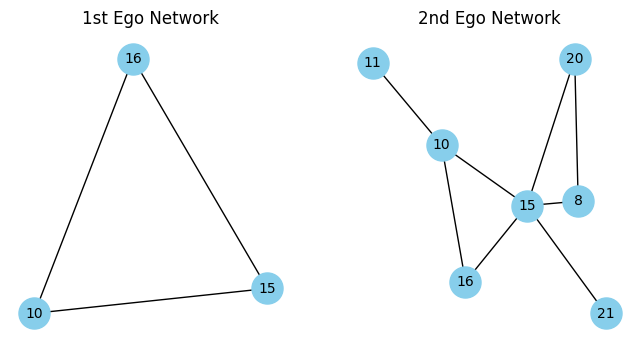

Ego Network for node - 17


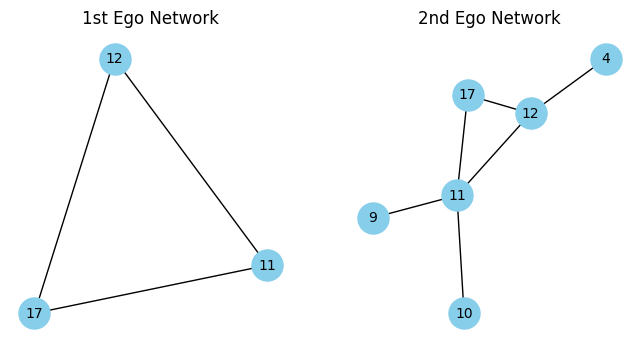

Ego Network for node - 13


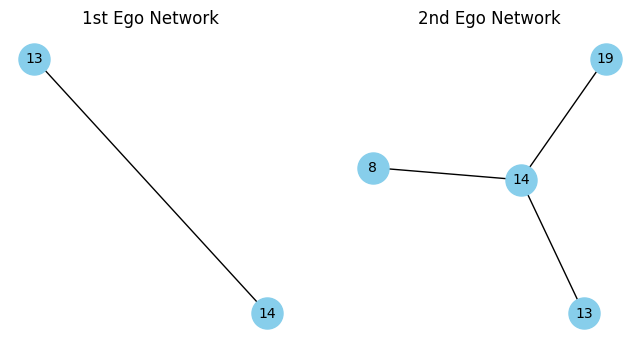

Ego Network for node - 19


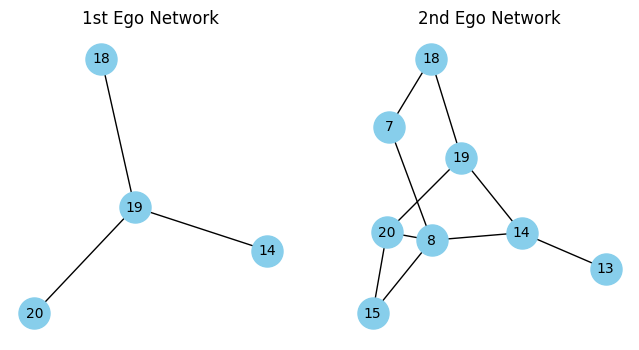

Ego Network for node - 21


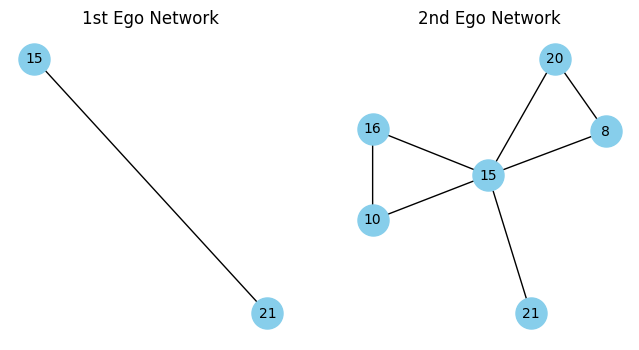

In [7]:
# Plotting 1st and 2nd ego network of each node in the sample network
for node in sample_network.nodes():
    plot_ego_network_feature(sample_network, node)

In [8]:
# Function to extract ego network features:
def extract_ego_network_feature(network, node, radius=1):

    ego_net = nx.ego_graph(network, node, radius=radius)
    features = {}

    # Ego netwrok properties
    features['number_of_nodes'] = ego_net.number_of_nodes()
    features['number_of_edges'] = ego_net.number_of_edges()
    features['ego_density'] = nx.density(ego_net)
    features['triangle_count'] = sum(nx.triangles(ego_net).values())//3

    # calculate clustering coefficient only for first ego network
    if radius==1:
        features['node_clustering_coefficient'] = nx.clustering(ego_net, node)

    return features

In [9]:
# Generating 1st Ego Network Features
ego_network_features_1 = {}

for node in sample_network.nodes():
    ego_network_features_1[node] = extract_ego_network_feature(sample_network, node, radius=1)

In [10]:
# Generating 2nd Ego Network Features
ego_network_features_2 = {}

for node in sample_network.nodes():
    ego_network_features_2[node] = extract_ego_network_feature(sample_network, node, radius=2)

In [11]:
print(f"Node:\tENodes\tEEdges\tTriangles\tEDensity\tClustCoEf")
for node, properties in ego_network_features_1.items():
    print(f"{node}\t{properties['number_of_nodes']}\t{properties['number_of_edges']}\t{properties['triangle_count']}\t{properties['ego_density']}\t{properties['node_clustering_coefficient']}")

Node:	ENodes	EEdges	Triangles	EDensity	ClustCoEf
1	4	4	1	0.6666666666666666	0.3333333333333333
2	3	2	0	0.6666666666666666	0
6	5	7	3	0.7	0.5
7	6	8	3	0.5333333333333333	0.3
3	4	3	0	0.5	0
4	3	2	0	0.6666666666666666	0
9	4	3	0	0.5	0
12	4	4	1	0.6666666666666666	0.3333333333333333
5	3	3	1	1.0	1.0
8	7	8	2	0.38095238095238093	0.13333333333333333
18	3	2	0	0.6666666666666666	0
14	4	3	0	0.5	0
15	6	7	2	0.4666666666666667	0.2
20	4	4	1	0.6666666666666666	0.3333333333333333
11	5	5	1	0.5	0.16666666666666666
10	4	4	1	0.6666666666666666	0.3333333333333333
16	3	3	1	1.0	1.0
17	3	3	1	1.0	1.0
13	2	1	0	1.0	0
19	4	3	0	0.5	0
21	2	1	0	1.0	0


In [12]:
print(f"Node:\tENodes\tEEdges\tTriangles\tEDensity")
for node, properties in ego_network_features_2.items():
    print(f"{node}\t{properties['number_of_nodes']}\t{properties['number_of_edges']}\t{properties['triangle_count']}\t{properties['ego_density']}")

Node:	ENodes	EEdges	Triangles	EDensity
1	8	10	3	0.35714285714285715
2	7	7	1	0.3333333333333333
6	11	14	4	0.2545454545454545
7	12	17	4	0.25757575757575757
3	8	8	0	0.2857142857142857
4	7	8	1	0.38095238095238093
9	14	18	3	0.1978021978021978
12	7	8	1	0.38095238095238093
5	6	8	3	0.5333333333333333
8	17	24	5	0.17647058823529413
18	9	13	3	0.3611111111111111
14	10	13	2	0.28888888888888886
15	12	16	3	0.24242424242424243
20	12	16	3	0.24242424242424243
11	10	13	2	0.28888888888888886
10	10	13	3	0.28888888888888886
16	7	8	2	0.38095238095238093
17	6	6	1	0.4
13	4	3	0	0.5
19	8	10	1	0.35714285714285715
21	6	7	2	0.4666666666666667


Ego Network for node - 16


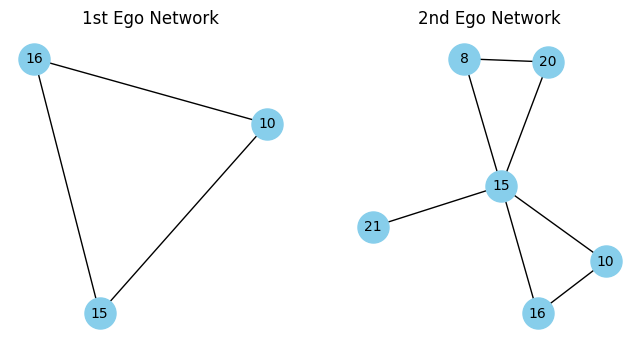

Ego Network for node - 15


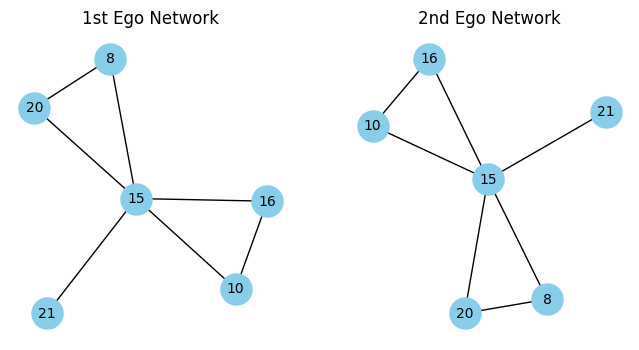

Ego Network for node - 21


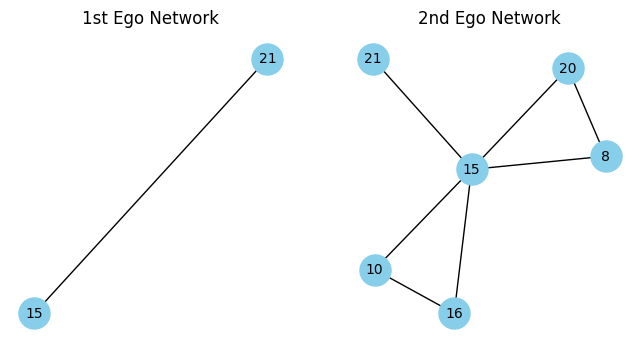

Ego Network for node - 8


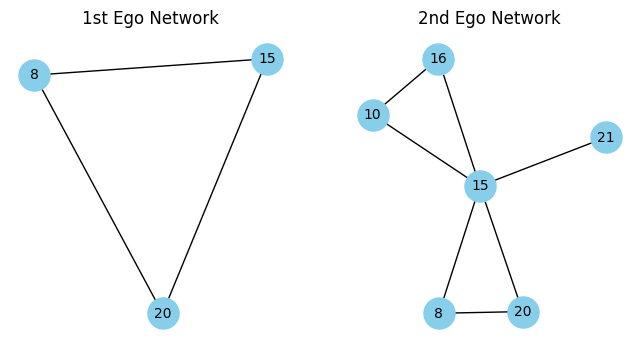

Ego Network for node - 20


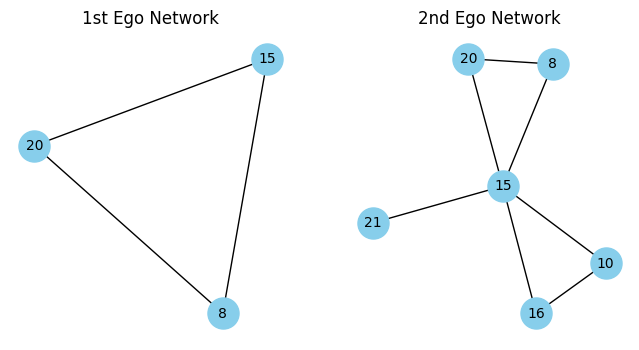

Ego Network for node - 10


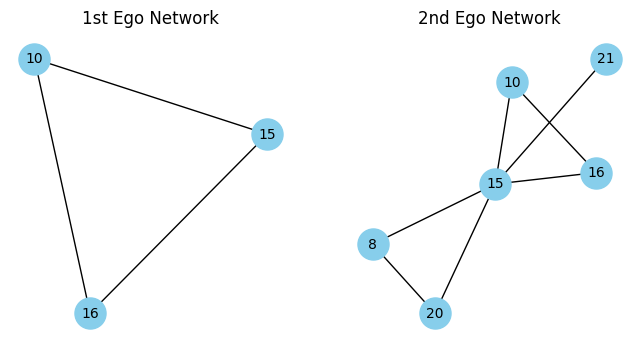

In [13]:
# Testing
test_network = nx.ego_graph(sample_network, '15')

for node in test_network.nodes():
    plot_ego_network_feature(test_network, node)

In [14]:
[node for node in test_network.neighbors('15')]

['16', '8', '10', '20', '21']

In [15]:
test_network.edges()

EdgeView([('16', '10'), ('16', '15'), ('15', '8'), ('15', '10'), ('15', '20'), ('15', '21'), ('8', '20')])

In [16]:
nx.triangles(test_network)

{'16': 1, '15': 2, '21': 0, '8': 1, '20': 1, '10': 1}

In [17]:
for cycle in nx.cycle_basis(test_network):
    print(cycle)
    # plt.figure(figsize=(2,2))
    # pos = nx.spring_layout(cycle)
    # nx.draw(cycle, pos, with_labels=True, node_color='skyblue', node_size=500, edge_color='black', linewidths=1, font_size=10)
    # plt.title("Graph Visualization")
    # plt.show()


['16', '15', '10']
['8', '20', '15']


In [18]:
test_network_2 = nx.ego_graph(sample_network, '7')

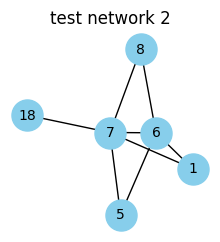

In [19]:
plt.figure(figsize=(2,2))
pos = nx.spring_layout(test_network_2)
nx.draw(test_network_2, pos, with_labels=True, node_color='skyblue', node_size=500, edge_color='black', linewidths=1, font_size=10)
plt.title("test network 2")
plt.show()

In [20]:
for cycle in nx.cycle_basis(test_network_2):
    print(cycle)

['7', '6', '5']
['7', '8', '6']
['7', '1', '6']


In [21]:
test_network_2.edges()

EdgeView([('1', '6'), ('1', '7'), ('18', '7'), ('8', '6'), ('8', '7'), ('7', '5'), ('7', '6'), ('6', '5')])

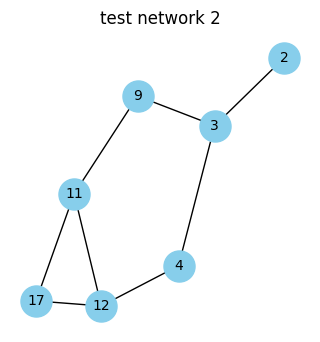

In [22]:
test_network_4 = nx.ego_graph(sample_network, '4', radius=2)
plt.figure(figsize=(3,3))
pos = nx.spring_layout(test_network_4)
nx.draw(test_network_4, pos, with_labels=True, node_color='skyblue', node_size=500, edge_color='black', linewidths=1, font_size=10)
plt.title("test network 2")
plt.show()

In [25]:
for cycle in nx.cycle_basis(test_network_4):
    print(cycle)

['12', '17', '11']
['4', '12', '11', '9', '3']
